In [ ]:
import pandas as pd

df = pd.read_csv('Cineticas.csv')
df = df.dropna()
t_data = np.array(df.iloc[:, [i for i in range(1,10)]].head(1))[0][::-1]
y_data_val = np.array(df.iloc[:, [i for i in range(19,28)]].head())
y_data_val



array([[38.01  , 36.32  , 35.533 , 34.8066, 34.3166, 33.5966, 32.22  ,
        30.9866, 28.92  ],
       [32.0233, 25.71  , 23.73  , 22.75  , 22.01  , 20.8766, 19.5633,
        18.5433, 17.0466],
       [28.69  , 25.48  , 24.43  , 23.66  , 23.26  , 22.49  , 21.06  ,
        20.03  , 18.11  ],
       [29.21  , 25.48  , 24.13  , 23.45  , 22.94  , 20.74  , 15.63  ,
        14.98  , 13.67  ]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

# Generar datos simulados (curvas senoides con ruido)
def generar_datos(q_e, k1, t):
    """Genera datos para la función y = a * sin(b * x) + c con ruido."""
    q_t = q_e * (1- np.exp(-k1 * t)) + 1 * np.random.normal(size=t.shape)
    return q_t

# Crear un conjunto de datos de entrenamiento con diferentes parámetros
parametros = []
dataset = []

# Generar múltiples conjuntos de datos con diferentes parámetros (a, b, c)
for _ in range(1000):
    q_e = random.uniform(10, 100)  # Rango de a entre 1 y 5
    k1 = random.uniform(0.001, 1)  # Rango de b entre 0.5 y 2.0
    y_data = generar_datos(q_e, k1, t_data)
    parametros.append([q_e, k1])  # Guardar los parámetros reales
    dataset.append(y_data)  # Guardar los datos simulados

# Convertir a arrays para uso posterior
parametros = np.array(parametros)
dataset = np.array(dataset)


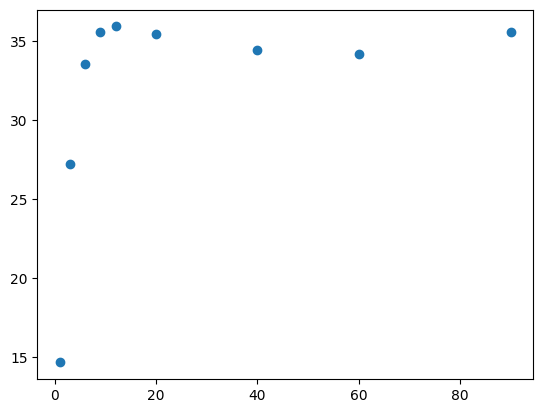

In [ ]:
plt.scatter(t_data,dataset[0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Calcular características estadísticas de los datos (e.g., media, amplitud)
def extraer_caracteristicas(y):
    """Extrae características como media, amplitud y desviación estándar."""
    return [np.mean(y), np.std(y), np.min(y), np.max(y)]

# Extraer características de cada conjunto de datos
caracteristicas = np.array([extraer_caracteristicas(y) for y in dataset])

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, parametros, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Entrenar un modelo de regresión Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100)
modelo_rf.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo_rf.predict(X_test_scaled)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.4f}")


Error cuadrático medio: 2.9529


Parámetros iniciales predichos: a = 37.0509, b = 0.8208
Parámetros ajustados con curve_fit: a = 34.5284, b = 1.7658


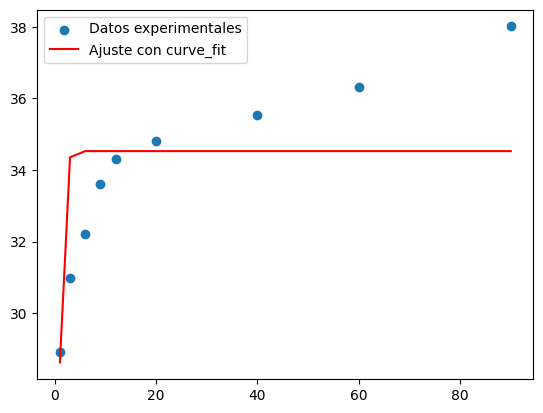

In [ ]:
# Generar un nuevo conjunto de datos y predecir sus parámetros iniciales
nuevos_y = y_data_val[0]
nuevas_caracteristicas = scaler.transform([extraer_caracteristicas(nuevos_y)])

# Predecir parámetros iniciales con el modelo entrenado
parametros_iniciales = modelo_rf.predict(nuevas_caracteristicas)[0]
print(f"Parámetros iniciales predichos: a = {parametros_iniciales[0]:.4f}, b = {parametros_iniciales[1]:.4f}")

# Ajustar la curva usando curve_fit con los parámetros predichos
def funcion_modelo(t, q_e, k1):
  q_t = q_e * (1- np.exp(-k1 * t))
  return q_t



parametros_ajustados, _ = curve_fit(funcion_modelo, t_data, nuevos_y, p0=parametros_iniciales)
print(f"Parámetros ajustados con curve_fit: a = {parametros_ajustados[0]:.4f}, b = {parametros_ajustados[1]:.4f}")


# Graficar los resultados
y_fit = funcion_modelo(t_data, *parametros_ajustados)
plt.scatter(t_data, nuevos_y, label='Datos experimentales')
plt.plot(t_data, y_fit, label='Ajuste con curve_fit', color='red')
plt.legend()
plt.show()


<ipython-input-14-ba268e9b77c5>:11: RuntimeWarning: overflow encountered in exp
  q_t = q_e * (1- np.exp(-k1 * t))


Parámetros ajustados con curve_fit: a = 28.5430, b = 0.8270


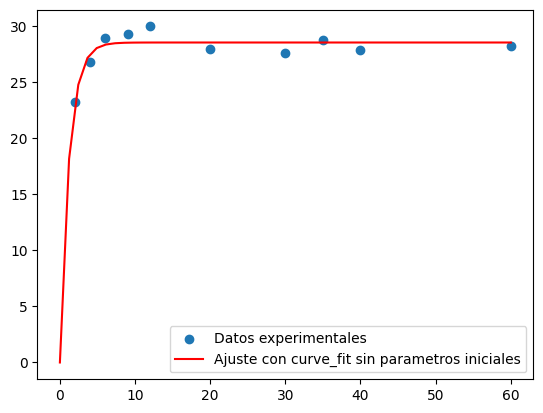

In [ ]:
parametros_ajustados, _ = curve_fit(funcion_modelo, t_data, nuevos_y, p0 = [3,1])
print(f"Parámetros ajustados con curve_fit: a = {parametros_ajustados[0]:.4f}, b = {parametros_ajustados[1]:.4f}")
t_data1 = np.linspace(0, 60, 50)

# Graficar los resultados
y_fit = funcion_modelo(t_data1, *parametros_ajustados)
plt.scatter(t_data, nuevos_y, label='Datos experimentales')
plt.plot(t_data1, y_fit, label='Ajuste con curve_fit sin parametros iniciales', color='red')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('Cineticas.csv')
df.head()

,Unnamed: 0,Tiempo (min),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,(mg adsorbato adsorbido/mg adsorbato total)*100,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,? -FeOOH 0.05 M-Sb,1,3,6,9,12,20,40,60,90,...,2.3040,6.0089,10.1879,12.1340,13.9303,15.1419,16.9224,20.3264,23.3764,28.4866
1,60ppmSb-Sb,1,3,6,9,12,20,40,60,90,...,5.3933,27.2418,41.5858,46.0845,48.3111,49.9924,52.5675,55.5514,57.8689,61.2694
2,60ppmAs-Sb,1,3,6,9,12,20,40,60,90,...,5.1500,34.5873,41.9061,44.3000,46.0556,46.9676,48.7232,51.9836,54.3320,58.7095
3,60ppmHg-Sb,1,3,6,9,12,20,40,60,90,...,5.6000,29.1541,36.9102,42.0926,43.7245,44.9484,50.2280,62.4910,64.0509,67.1946
4,120ppmAs-Sb,1,3,6,9,12,20,40,60,90,...,NaN,21.8171,29.4321,34.5777,37.2866,39.5629,43.5238,51.3317,56.1120,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Unnamed: 0,Tiempo (min),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,(mg adsorbato adsorbido/mg adsorbato total)*100,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,? -FeOOH 0.05 M-Sb,1,3,6,9,12,20,40,60,90,...,2.3040,6.0089,10.1879,12.1340,13.9303,15.1419,16.9224,20.3264,23.3764,28.4866
1,60ppmSb-Sb,1,3,6,9,12,20,40,60,90,...,5.3933,27.2418,41.5858,46.0845,48.3111,49.9924,52.5675,55.5514,57.8689,61.2694
2,60ppmAs-Sb,1,3,6,9,12,20,40,60,90,...,5.1500,34.5873,41.9061,44.3000,46.0556,46.9676,48.7232,51.9836,54.3320,58.7095
3,60ppmHg-Sb,1,3,6,9,12,20,40,60,90,...,5.6000,29.1541,36.9102,42.0926,43.7245,44.9484,50.2280,62.4910,64.0509,67.1946


In [ ]:
df = df.dropna()
t_data = np.array(df.iloc[:, [i for i in range(1,10)]].head(1))[0][::-1]
y_data = np.array(df.iloc[:, [i for i in range(19,28)]].head())
y_data



array([[38.01  , 36.32  , 35.533 , 34.8066, 34.3166, 33.5966, 32.22  ,
        30.9866, 28.92  ],
       [32.0233, 25.71  , 23.73  , 22.75  , 22.01  , 20.8766, 19.5633,
        18.5433, 17.0466],
       [28.69  , 25.48  , 24.43  , 23.66  , 23.26  , 22.49  , 21.06  ,
        20.03  , 18.11  ],
       [29.21  , 25.48  , 24.13  , 23.45  , 22.94  , 20.74  , 15.63  ,
        14.98  , 13.67  ]])

Parámetros ajustados con curve_fit: a = -95.5161, b = 251.9509


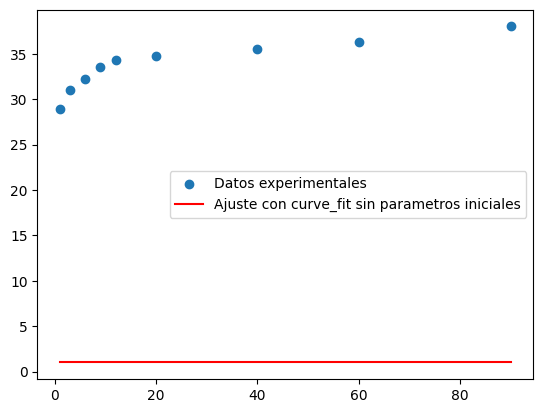

In [ ]:
def funcion_modelo(t, q_e, k_2):
  q_t = k_2*q_e**2*t/(1+k_2*q_e**2*t)
  return q_t

parametros_ajustados, _ = curve_fit(funcion_modelo, t_data, y_data[0])
print(f"Parámetros ajustados con curve_fit: a = {parametros_ajustados[0]:.4f}, b = {parametros_ajustados[1]:.4f}")


# Graficar los resultados
y_fit = funcion_modelo(t_data, *parametros_ajustados)
plt.scatter(t_data, y_data[0], label='Datos experimentales')
plt.plot(t_data, y_fit, label='Ajuste con curve_fit sin parametros iniciales', color='red')
plt.legend()
plt.show()